In [29]:
# import os
# import csv


# image_folder_path = r"C:\Users\Mehul\Desktop\pbl plant\images"

# # labels for each class
# labels = {
#     "rose": "rose",
#     "aloevera": "aloevera",
#     "sugarcane": "sugarcane",
#     "hibiscous": "hibiscous",
#     "bamboo": "bamboo"
# }

# # Create an empty list to store the image filenames and labels
# image_list = []

# # Loop through each folder in the image folder path
# for folder in os.listdir(image_folder_path):
#     # Get the label for this folder
#     label = labels.get(folder)
#     if label is not None:
#         # Loop through each image in the folder
#         for filename in os.listdir(os.path.join(image_folder_path, folder)):
#             # Add the filename and label to the image list
#             image_list.append((os.path.join(folder, filename), label))

# # Write the image list to a CSV file
# with open("image_labels.csv", "w", newline="") as csv_file:
#     writer = csv.writer(csv_file)
#     writer.writerow(["filename", "label"])
#     for image in image_list:
#         writer.writerow(image)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
from IPython.display import Image

In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
data_csv = pd.read_csv(r"C:\Users\mehul\Downloads\pbl plant\pbl plant\image_labels.csv")
print('data shape: ', data_csv.shape)

categories = {0: 'aloe vera' , 1: 'hibiscous', 2: 'rose', 3: 'sugarcane'}

data_csv['category'] = data_csv['category'] 
data_csv['label'] = data_csv['category'].map(categories)
data_csv['label'] = pd.Categorical(data_csv['label'])
data_csv.head()

data shape:  (1940, 3)


,filename,label,category
0,aloevera\aloevera0.jpg,aloe vera,0
1,aloevera\aloevera1.jpg,aloe vera,0
2,aloevera\aloevera10.jpg,aloe vera,0
3,aloevera\aloevera100.jpg,aloe vera,0
4,aloevera\aloevera101.jpg,aloe vera,0


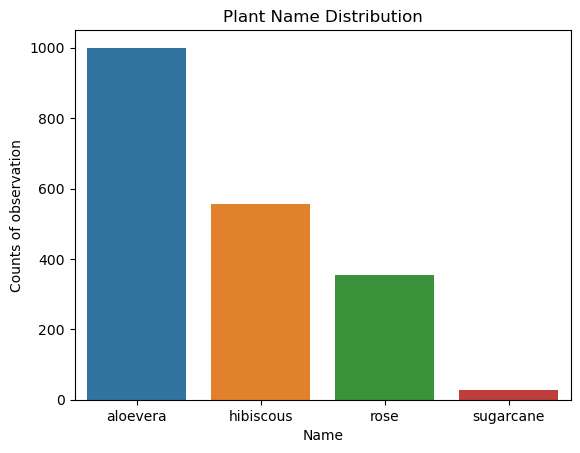

In [21]:

data_csv = pd.read_csv(r"C:\Users\mehul\Downloads\pbl plant\pbl plant\image_labels.csv")

category_counts = data_csv["label"].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Plant Name Distribution")
plt.xlabel("Name")
plt.ylabel("Counts of observation")
plt.show()


In [22]:
import cv2
import os
import numpy as np

path = r"C:\Users\mehul\Downloads\pbl plant\pbl plant\images"

img_list = list(data_csv['filename'])

data_img = []

for each in img_list:
    each_path = os.path.join(path, each)
    
    # Check if the image file exists
    if not os.path.exists(each_path):
        print(f"Image file not found: {each_path}")
        continue
    
    each_img = cv2.imread(each_path)
    
    # Check if the image was successfully read
    if each_img is None:
        print(f"Failed to read image: {each_path}")
        continue
    
    each_img = cv2.cvtColor(each_img, cv2.COLOR_BGR2RGB)
    each_img_resized = cv2.resize(each_img, (64, 64))
    each_img_scaled = each_img_resized / 255.0
    data_img.append(each_img_scaled)

X = np.array(data_img)

print('Shape of X: ', X.shape)


Shape of X:  (1940, 64, 64, 3)


In [23]:
from sklearn.preprocessing import OneHotEncoder

y = OneHotEncoder(dtype='int8', sparse=False).fit_transform(data_csv['category'].values.reshape(-1,1))
print('Shape of y: ', y.shape)

Shape of y:  (1940, 4)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
from sklearn.model_selection import train_test_split

X_data, X_test, y_data, y_test = train_test_split(X,y, test_size=0.15, random_state=30)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size = 0.15, random_state=30)

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(horizontal_flip= True,
                               rotation_range = 15,
                               
                               
                               width_shift_range = 0.5
                              )
validation_gen = ImageDataGenerator(horizontal_flip= True,
                               rotation_range = 15,
                               
                               
                               width_shift_range = 0.5
                              )

train_gen.fit(X_train)
validation_gen.fit(X_val)

In [26]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

batch_size = 100
epochs = 12

base = MobileNetV2(include_top=False, weights='imagenet', input_shape=(64, 64, 3))
x = base.output
x = keras.layers.GlobalAveragePooling2D()(x)

head = keras.layers.Dense(4, activation='softmax')(x)
model = keras.models.Model(inputs=base.input, outputs=head)
opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_gen.flow(X_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=validation_gen.flow(X_val, y_val, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size)


Epoch 1/12
14/14 [==============================] - 26s 935ms/step - loss: 1.4424 - accuracy: 0.4120 - val_loss: 2.5828 - val_accuracy: 0.2339
Epoch 2/12
14/14 [==============================] - 12s 814ms/step - loss: 0.7766 - accuracy: 0.7187 - val_loss: 2.4083 - val_accuracy: 0.2742
Epoch 3/12
14/14 [==============================] - 12s 834ms/step - loss: 0.5432 - accuracy: 0.8163 - val_loss: 1.9132 - val_accuracy: 0.3790
Epoch 4/12
14/14 [==============================] - 12s 871ms/step - loss: 0.5028 - accuracy: 0.8317 - val_loss: 1.5435 - val_accuracy: 0.4476
Epoch 5/12
14/14 [==============================] - 11s 875ms/step - loss: 0.4523 - accuracy: 0.8517 - val_loss: 1.3153 - val_accuracy: 0.5363
Epoch 6/12
14/14 [==============================] - 11s 812ms/step - loss: 0.4224 - accuracy: 0.8470 - val_loss: 1.3768 - val_accuracy: 0.5524
Epoch 7/12
14/14 [==============================] - 12s 822ms/step - loss: 0.3966 - accuracy: 0.8663 - val_loss: 1.1205 - val_accuracy: 0.6048

In [27]:
from matplotlib import pyplot as plt

10/10 [==============================] - 1s 60ms/step


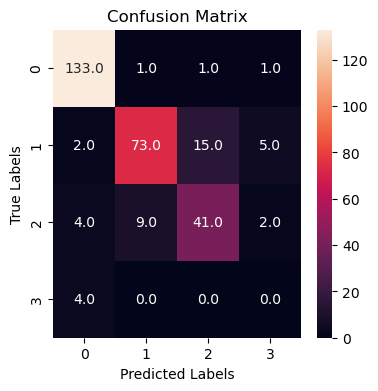

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

y_test_classes = np.argmax(y_test, axis=1)

confmx = confusion_matrix(y_test_classes, y_pred_classes)
f, ax = plt.subplots(figsize = (4,4))
sns.heatmap(confmx, annot=True, fmt = '.1f', ax=ax)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

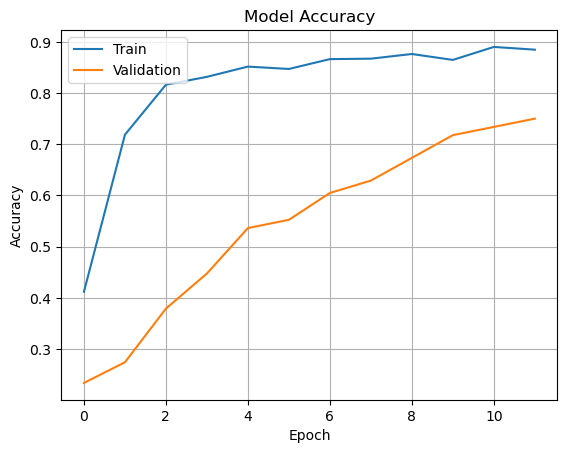

In [29]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

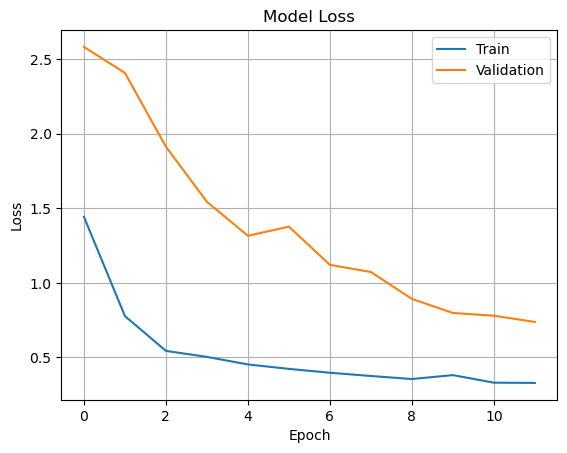

In [34]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()

In [30]:
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       136
           1       0.88      0.77      0.82        95
           2       0.72      0.73      0.73        56
           3       0.00      0.00      0.00         4

    accuracy                           0.85       291
   macro avg       0.63      0.62      0.62       291
weighted avg       0.86      0.85      0.85       291



In [31]:
model.save("mehul-pbl-plant.h5")

In [14]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 8.9/8.9 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 21.5/21.5 MB 5.2 MB/s eta 0:00:00
     -------------------------------------- 164.8/164.8 kB 5.0 MB/s eta 0:00:00
     -------------------------------------- 238.7/238.7 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 813.6/813.6 kB 5.7 MB/s eta 0:00:00
     -------------------------------------- 904.0/904.0 kB 7.2 MB/s eta 0:00:00
     ------------------------------------- 184.3/184.3 kB 10.9 MB/s eta 0:00:00
     ---------------------------------------- 62.7/62.7 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB 4.6 MB/s eta 0:00:00
     -------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\mehul\\AppData\\Roaming\\Python\\Python310\\site-packages\\google\\~upb\\_message.pyd'
Check the permissions.



In [32]:
%%writefile my_app.py
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image, ImageOps
st.title("Image Classification")
upload_file = st.sidebar.file_uploader("Upload plant image", type = 'jpg')
generate_pred = st.sidebar.button("predict")
model = tf.keras.models.load_model("mehul-pbl-plant.h5")
def import_n_pred(image_data, model):
    size = (128,128)
    image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
    img = np.asarray(image)
    reshape = img[np.newaxis,...]
    pred = model.predict(reshape)
    return pred
if generate_pred:
    image = Image.open(upload_file)
    with st.beta_expander('filename', expanded=True):
        st.image(image, use_column_width=True)
    pred = import_n_pred(image, model)
    labels = ['aloevera', 'hibiscous', 'rose', 'sugarcane']
    st.title("prediction of image is {}".format(labels[np.argmax(pred)]))

Writing my_app.py


In [33]:
!streamlit run my_app.py

'streamlit' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
conda list

# packages in environment at C:\ProgramData\Anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0            py39haa95532_0  
aiohttp                   3.8.1            py39h2bbff1b_1  
aiosignal                 1.2.0              pyhd3eb1b0_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda                  2022.05                  py39_0  
anaconda-client           1.9.0            py39haa95532_0  
anaconda-navigator        2.1.4            py39haa95532_0  
anaconda-project          0.10.2             pyhd3eb1b0_0  
anyio                     3.5.0            py39haa95532_0  
appdirs                   1.4.4              pyhd3eb1b0_0  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0           py39h2bbff1b_0  
arrow                     1.2.2              pyhd3eb1b0_0  
astroid                   2.6.6            py39haa95532_0  
astropy                   5.0.4     

In [ ]:
pip uninstall streamlit

jmespath                  0.10.0             pyhd3eb1b0_0  
joblib                    1.1.0              pyhd3eb1b0_0  
jpeg                      9e                   h2bbff1b_0  
jq                        1.6                  haa95532_1  
json5                     0.9.6              pyhd3eb1b0_0  
jsonschema                4.4.0            py39haa95532_0  
jupyter                   1.0.0            py39haa95532_7  
jupyter_client            6.1.12             pyhd3eb1b0_0  
jupyter_console           6.4.0              pyhd3eb1b0_0  
jupyter_core              4.9.2            py39haa95532_0  
jupyter_server            1.13.5             pyhd3eb1b0_0  
jupyterlab                3.3.2              pyhd3eb1b0_0  
jupyterlab_pygments       0.1.2                      py_0  
jupyterlab_server         2.10.3             pyhd3eb1b0_1  
jupyterlab_widgets        1.0.0              pyhd3eb1b0_1  
keyring                   23.4.0           py39haa95532_0  
kiwisolver                1.3.2         

In [ ]:
conda install streamlit

In [ ]:
conda list